In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import datetime

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import metrics
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample


In [7]:
bike_Pedestrian_crash_df = pd.read_csv('BikePedCrash.csv')
bike_Pedestrian_crash_df.head()

,X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
0,-78.883896,36.039490,1,Yes,11,0-19,.,No,With Traffic,B: Suspected Minor Injury,...,None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,1
1,-78.782800,35.751118,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,...,None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,2
2,-80.697820,35.084732,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,...,None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,3
3,-80.479320,35.684400,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,...,None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No,4
4,-78.904450,34.999428,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,...,None,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,5


In [56]:
bike_Pedestrian_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12173 entries, 0 to 12172
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            12173 non-null  float64
 1   Y            12173 non-null  float64
 2   OBJECTID_1   12173 non-null  int64  
 3   AmbulanceR   12173 non-null  object 
 4   BikeAge      12173 non-null  object 
 5   BikeAgeGrp   12173 non-null  object 
 6   BikeAlcDrg   12173 non-null  object 
 7   BikeAlcFlg   12173 non-null  object 
 8   BikeDir      12173 non-null  object 
 9   BikeInjury   12173 non-null  object 
 10  BikePos      12173 non-null  object 
 11  BikeRace     12173 non-null  object 
 12  BikeSex      12173 non-null  object 
 13  City         12173 non-null  object 
 14  County       12173 non-null  object 
 15  CrashAlcoh   12173 non-null  object 
 16  CrashDay     12173 non-null  object 
 17  CrashGrp     12173 non-null  object 
 18  CrashHour    12173 non-null  int64  
 19  Cras

In [8]:
bike_Pedestrian_crash_df.columns

Index(['X', 'Y', 'OBJECTID_1', 'AmbulanceR', 'BikeAge', 'BikeAgeGrp',
       'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos',
       'BikeRace', 'BikeSex', 'City', 'County', 'CrashAlcoh', 'CrashDay',
       'CrashGrp', 'CrashHour', 'CrashID', 'CrashLoc', 'CrashMonth',
       'CrashSevr', 'CrashType', 'CrashYear', 'Development', 'DrvrAge',
       'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace',
       'DrvrSex', 'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumBicsAin', 'NumBicsBin', 'NumBicsCin', 'NumBicsKil',
       'NumBicsNoi', 'NumBicsTot', 'NumBicsUin', 'NumLanes', 'NumUnits',
       'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdDefects',
       'RdFeature', 'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit',
       'TraffCntrl', 'Weather', 'Workzone', 'OBJECTID'],
      dtype='object')

In [9]:
bike_Pedestrian_crash_df = bike_Pedestrian_crash_df.drop(['X','Y','BikeAge','DrvrAge','OBJECTID_1','NumBicsAin', 'NumBicsBin', 'NumBicsCin', 'NumBicsKil',
       'NumBicsNoi', 'NumBicsTot', 'NumBicsUin'],axis =1)

In [11]:
bike_Pedestrian_crash_df.isnull().sum().sort_values(ascending=False)

AmbulanceR     0
RdClass        0
DrvrSex        0
DrvrVehTyp     0
HitRun         0
Latitude       0
LightCond      0
Locality       0
Longitude      0
NumLanes       0
NumUnits       0
RdCharacte     0
RdConditio     0
BikeAgeGrp     0
RdConfig       0
RdDefects      0
RdFeature      0
RdSurface      0
Region         0
RuralUrban     0
SpeedLimit     0
TraffCntrl     0
Weather        0
Workzone       0
DrvrRace       0
DrvrInjury     0
DrvrAlcFlg     0
DrvrAlcDrg     0
BikeAlcDrg     0
BikeAlcFlg     0
BikeDir        0
BikeInjury     0
BikePos        0
BikeRace       0
BikeSex        0
City           0
County         0
CrashAlcoh     0
CrashDay       0
CrashGrp       0
CrashHour      0
CrashID        0
CrashLoc       0
CrashMonth     0
CrashSevr      0
CrashType      0
CrashYear      0
Development    0
DrvrAgeGrp     0
OBJECTID       0
dtype: int64

In [12]:
# Create more condense groups for DrvrAgeGrp in order to deal with some potential outliers.
# Driver Age Group
bike_Pedestrian_crash_df['DrvrAgeGrp'].value_counts()/bike_Pedestrian_crash_df.shape[0]*100

30-39      15.682248
40-49      14.753964
Unknown    13.759961
50-59      12.733098
20-24      10.523289
60-69       9.619650
25-29       9.488212
70+         7.771297
0-19        5.668282
Name: DrvrAgeGrp, dtype: float64

In [13]:
#I did this before hand because as "Over 70", it wouldnt convert in the codes below
bike_Pedestrian_crash_df['DrvrAgeGrp']=bike_Pedestrian_crash_df['DrvrAgeGrp'].replace("70+","70-100")

In [14]:
age1 = ["0 - 19"]
age2 = ["20 - 24","25 - 29"]
age3 = ["30 - 39"]
age4 = ["40-49","50-59"]
age5 = ["60-69", "70-100"]

In [15]:
for (row, col) in bike_Pedestrian_crash_df.iterrows():

    if str.lower(col.DrvrAgeGrp) in age1:
        bike_Pedestrian_crash_df['DrvrAgeGrp'].replace(to_replace=col.DrvrAgeGrp, 
                                         value='Under 20', inplace=True)

    if str.lower(col.DrvrAgeGrp) in age2:
        bike_Pedestrian_crash_df['DrvrAgeGrp'].replace(to_replace=col.DrvrAgeGrp, 
                                         value='20-29', inplace=True)
    
    if str.lower(col.DrvrAgeGrp) in age3:
        bike_Pedestrian_crash_df['DrvrAgeGrp'].replace(to_replace=col.DrvrAgeGrp, 
                                         value='30-39', inplace=True)
    if str.lower(col.DrvrAgeGrp) in age4:
        bike_Pedestrian_crash_df['DrvrAgeGrp'].replace(to_replace=col.DrvrAgeGrp, 
                                         value='40-59', inplace=True)
    if str.lower(col.DrvrAgeGrp) in age5:
        bike_Pedestrian_crash_df['DrvrAgeGrp'].replace(to_replace=col.DrvrAgeGrp, 
                                         value='Over 60', inplace=True)

In [16]:
#Driver Age Group
print("Distinct responses for DrvrAgeGrp:\n", set(bike_Pedestrian_crash_df['DrvrAgeGrp']))

Distinct responses for DrvrAgeGrp:
 {'0-19', '30-39', 'Unknown', '25-29', 'Over 60', '20-24', '40-59'}


In [17]:
#Dropping unknown rows from Driver age group
bike_Pedestrian_crash_df.drop(bike_Pedestrian_crash_df[bike_Pedestrian_crash_df['DrvrAgeGrp'] == 'Unknown'].index, inplace = True)


In [18]:
# Create more condense groups for BikeAgeGrp in order to deal with some potential outliers.
# Bike Age Group
bike_Pedestrian_crash_df['BikeAgeGrp'].value_counts()/bike_Pedestrian_crash_df.shape[0]*100

0-19       29.281768
50-59      14.774243
40-49      13.726424
20-24      11.811774
30-39      11.706992
25-29       8.258716
60-69       6.686988
Unknown     1.914650
70+         1.838445
Name: BikeAgeGrp, dtype: float64

In [69]:
#I did this before hand because as "Over 70", it wouldnt convert in the codes below
bike_Pedestrian_crash_df['BikeAgeGrp']=bike_Pedestrian_crash_df['BikeAgeGrp'].replace("70+","70-100")

In [19]:
age1 = ["0 - 19"]
age2 = ["20 - 24","25 - 29"]
age3 = ["30 - 39"]
age4 = ["40-49","50-59"]
age5 = ["60-69", "70-100"]



In [20]:
for (row, col) in bike_Pedestrian_crash_df.iterrows():

    if str.lower(col.BikeAgeGrp) in age1:
        bike_Pedestrian_crash_df['BikeAgeGrp'].replace(to_replace=col.BikeAgeGrp, 
                                         value='Under 20', inplace=True)

    if str.lower(col.BikeAgeGrp) in age2:
        bike_Pedestrian_crash_df['BikeAgeGrp'].replace(to_replace=col.BikeAgeGrp, 
                                         value='20-29', inplace=True)
    
    if str.lower(col.BikeAgeGrp) in age3:
        bike_Pedestrian_crash_df['BikeAgeGrp'].replace(to_replace=col.BikeAgeGrp, 
                                         value='30-39', inplace=True)
    if str.lower(col.BikeAgeGrp) in age4:
        bike_Pedestrian_crash_df['BikeAgeGrp'].replace(to_replace=col.BikeAgeGrp, 
                                         value='40-59', inplace=True)
    if str.lower(col.BikeAgeGrp) in age5:
        bike_Pedestrian_crash_df['BikeAgeGrp'].replace(to_replace=col.BikeAgeGrp, 
                                         value='Over 60', inplace=True)

In [21]:
#Bike Age Group
print("Distinct responses for BikeAgeGrp:\n", set(bike_Pedestrian_crash_df['BikeAgeGrp']))

Distinct responses for BikeAgeGrp:
 {'0-19', 'Unknown', '25-29', 'Over 60', '70+', '40-59', '20-24', '30-39'}


In [22]:
#Dropping unknown rows from Bike age group
bike_Pedestrian_crash_df.drop(bike_Pedestrian_crash_df[bike_Pedestrian_crash_df['BikeAgeGrp'] == 'Unknown'].index, inplace = True)


In [23]:
#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [24]:
#create CrashTimeofDay grouping

def daygroup(CrashHour):
    if CrashHour >= 6 and CrashHour < 10:
        return "1"
    elif CrashHour >= 10 and CrashHour < 12:
        return "2"
    elif CrashHour >= 12 and CrashHour < 14:
        return "3"
    elif CrashHour >= 14 and CrashHour < 16:
        return "4"
    elif CrashHour >= 16 and CrashHour < 18:
        return "5"
    elif CrashHour >= 18 and CrashHour < 22:
        return "6"
    else:
        return "7"

In [25]:
#apply function   
#time of day function
bike_Pedestrian_crash_df['CrashTimeofDay']= bike_Pedestrian_crash_df['CrashHour'].apply(daygroup)   

In [26]:
bike_Pedestrian_crash_df[['CrashDay','CrashHour', 'CrashTimeofDay']].tail(10)

,CrashDay,CrashHour,CrashTimeofDay
12159,Thursday,13,3
12161,Saturday,14,4
12162,Saturday,20,6
12165,Thursday,17,5
12166,Friday,15,4
12167,Tuesday,16,5
12168,Saturday,15,4
12169,Sunday,16,5
12170,Monday,15,4
12171,Friday,15,4


In [27]:
# Creating Seasons Column for ML

# Creating Seasons Column

def getCrashSeason(CrashMonth):
    if (CrashMonth == 'December' or CrashMonth == 'January' or CrashMonth == 'February'):
       return "Winter"
    elif(CrashMonth == 'March' or CrashMonth == 'April' or CrashMonth == 'May'):
       return "Spring"
    elif(CrashMonth == 'June' or CrashMonth== 'July' or CrashMonth == 'August'):
       return "Summer"
    else:
       return "Fall"

bike_Pedestrian_crash_df['CrashSeason'] = bike_Pedestrian_crash_df['CrashMonth'].apply(getCrashSeason)

In [28]:
# Number of Crashes Season wise
bike_Pedestrian_crash_df['CrashSeason'].value_counts()/bike_Pedestrian_crash_df.shape[0]*100

Summer    31.446052
Fall      28.726814
Spring    25.337477
Winter    14.489657
Name: CrashSeason, dtype: float64

In [29]:
# City
bike_Pedestrian_crash_df['City'].value_counts()

None - Rural Crash    2212
Charlotte             1196
Raleigh                911
Wilmington             510
Durham                 437
                      ... 
Mineral Springs          1
Fairmont                 1
Alamance                 1
Lumber Bridge            1
Taylorsville             1
Name: City, Length: 315, dtype: int64

In [30]:
#Bike Age Group
print("Distinct responses for CrashSevr:\n", set(bike_Pedestrian_crash_df['CrashSevr']))

Distinct responses for CrashSevr:
 {'B: Suspected Minor Injury', 'Unknown Injury', 'C: Possible Injury', 'K: Killed', 'O: No Injury', 'A: Suspected Serious Injury'}


In [31]:
#Dropping unknown option from CrashSeverity group
bike_Pedestrian_crash_df.drop(bike_Pedestrian_crash_df[bike_Pedestrian_crash_df['CrashSevr'] == 'Unknown Injury'].index, inplace = True)
print("Distinct responses for CrashSevr:\n", set(bike_Pedestrian_crash_df['CrashSevr']))

Distinct responses for CrashSevr:
 {'B: Suspected Minor Injury', 'C: Possible Injury', 'K: Killed', 'O: No Injury', 'A: Suspected Serious Injury'}


In [32]:
#create new Column for Machine Learning and Visualization with Fatal & Non- Fatal

bike_Pedestrian_crash_df['Crash_Fatality'] = bike_Pedestrian_crash_df['CrashSevr']
bike_Pedestrian_crash_df['Crash_Fatality'] = bike_Pedestrian_crash_df['Crash_Fatality'].replace (to_replace="K: Killed", 
                                                                value="Fatal")
bike_Pedestrian_crash_df['Crash_Fatality'] = bike_Pedestrian_crash_df['Crash_Fatality'].replace (to_replace="A: Suspected Serious Injury", 
                                                                value="Fatal")
bike_Pedestrian_crash_df['Crash_Fatality'] = bike_Pedestrian_crash_df['Crash_Fatality'].replace (to_replace="C: Possible Injury", 
                                                                value="Non-Fatal")

bike_Pedestrian_crash_df['Crash_Fatality'] = bike_Pedestrian_crash_df['Crash_Fatality'].replace (to_replace="B: Suspected Minor Injury", 
                                                                value="Non-Fatal")

bike_Pedestrian_crash_df['Crash_Fatality'] = bike_Pedestrian_crash_df['Crash_Fatality'].replace (to_replace="O: No Injury", 
                                                                value="Non-Fatal")
bike_Pedestrian_crash_df.shape

(10279, 53)

In [33]:
bike_Pedestrian_crash_df.Crash_Fatality.value_counts()

Non-Fatal    9433
Fatal         846
Name: Crash_Fatality, dtype: int64

# Basic Exploration through Plots

Text(0.5, 1.0, 'Availability of Ambulance')

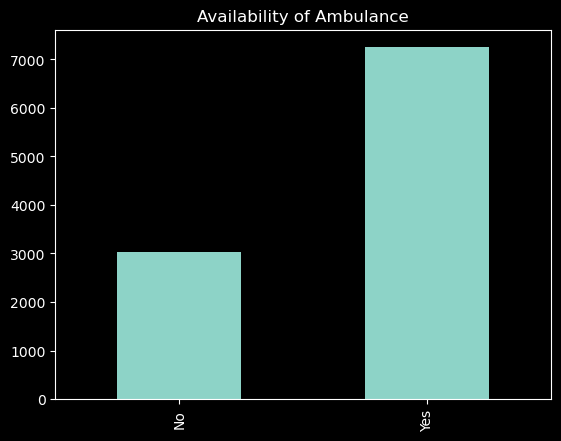

In [34]:
# Availability of ambulance at the sight of the accident
bike_Pedestrian_crash_df['AmbulanceR'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Availability of Ambulance")


Text(0.5, 1.0, 'Age group Analysis')

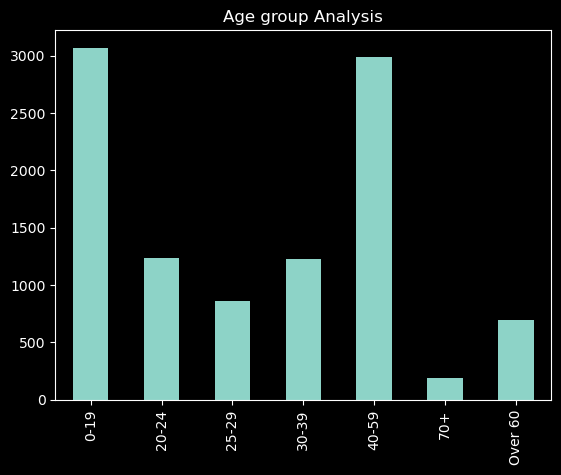

In [35]:
# Age Group wise Analysis
bike_Pedestrian_crash_df['BikeAgeGrp'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Age group Analysis")

Text(0.5, 1.0, 'Injuries')

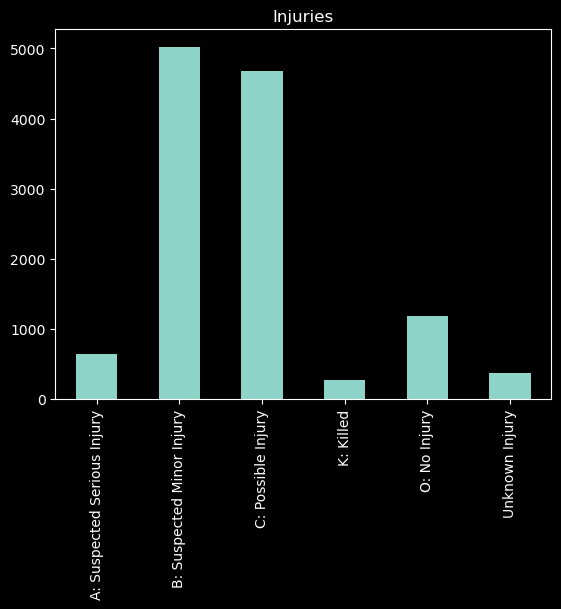

In [13]:
# Injuries due to Accidents
bike_Pedestrian_crash_df['BikeInjury'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Injuries")


Text(0.5, 1.0, 'Gender wise analysis')

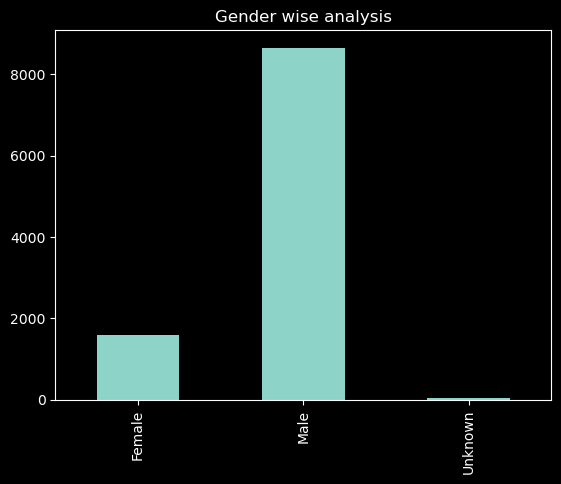

In [36]:
# Gender wise Analysis
bike_Pedestrian_crash_df['BikeSex'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Gender wise analysis")

Text(0.5, 1.0, 'Day of Accident')

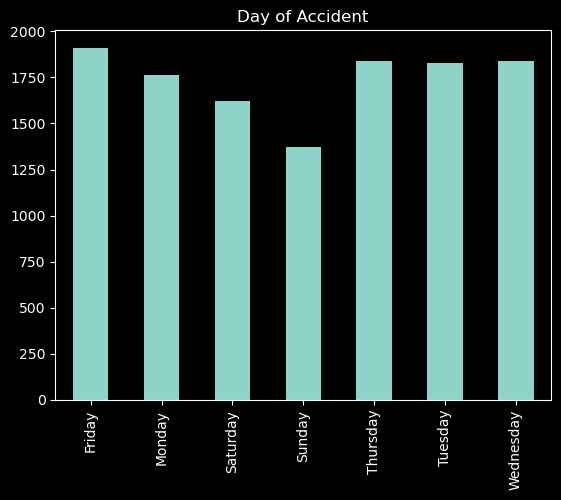

In [9]:
# Day wise crash analysis
bike_Pedestrian_crash_df['CrashDay'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Day of Accident")

Text(0.5, 1.0, 'Type of Accident')

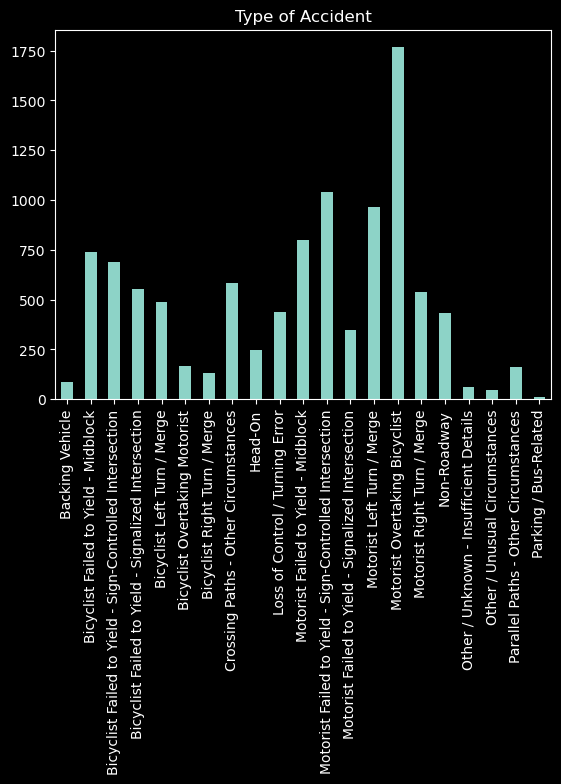

In [37]:
# Type of Accidents
bike_Pedestrian_crash_df['CrashGrp'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Type of Accident")

Text(0.5, 1.0, 'Location of Accident')

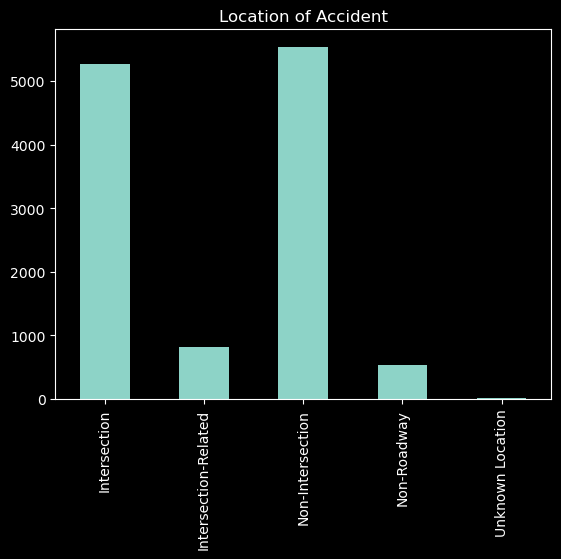

In [11]:
# Location of Accidents
bike_Pedestrian_crash_df['CrashLoc'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Location of Accident")

Text(0.5, 1.0, 'Region of Accident')

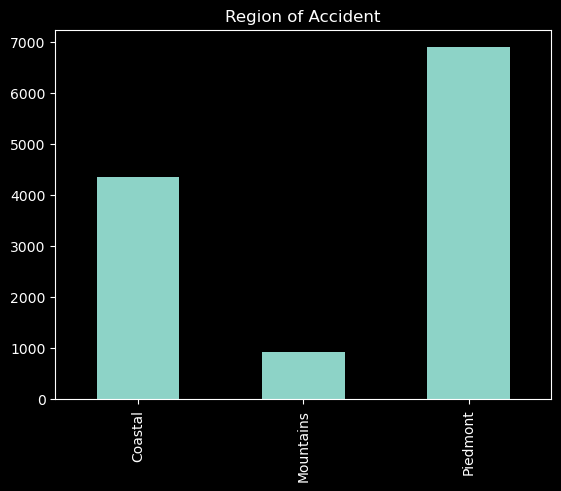

In [12]:
# Distribution of Accidents region-wise
bike_Pedestrian_crash_df['Region'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Region of Accident")

Text(0.5, 1.0, 'Traffic Control at the time of accident')

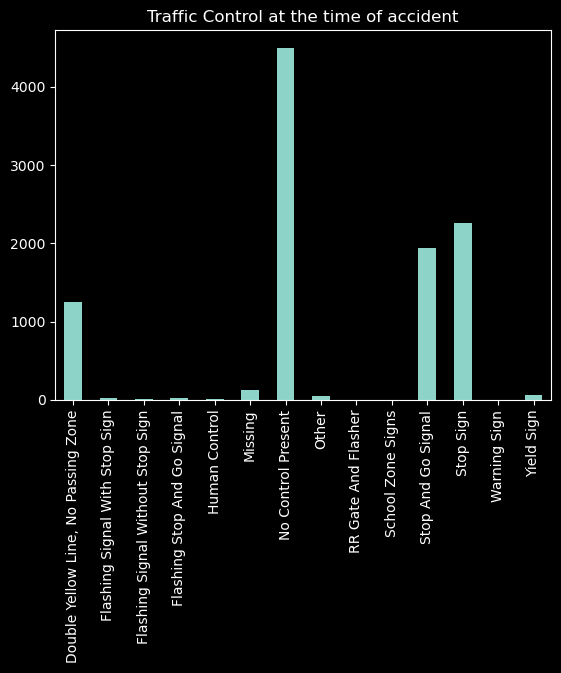

In [38]:
# Traffic control at the time of accident
bike_Pedestrian_crash_df['TraffCntrl'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Traffic Control at the time of accident")

Text(0.5, 1.0, 'Speed of the bike at the time of accident')

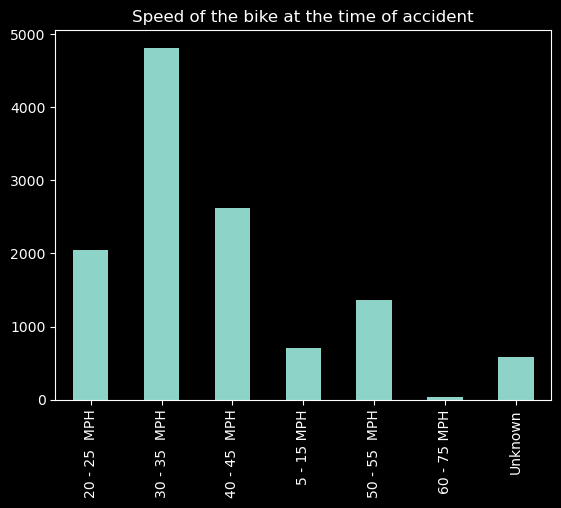

In [14]:
# Speed of the bike at the time of the accident
bike_Pedestrian_crash_df['SpeedLimit'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.title("Speed of the bike at the time of accident")

# Advanced Exploration through Plots

/Users/pawankumarvadlamani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


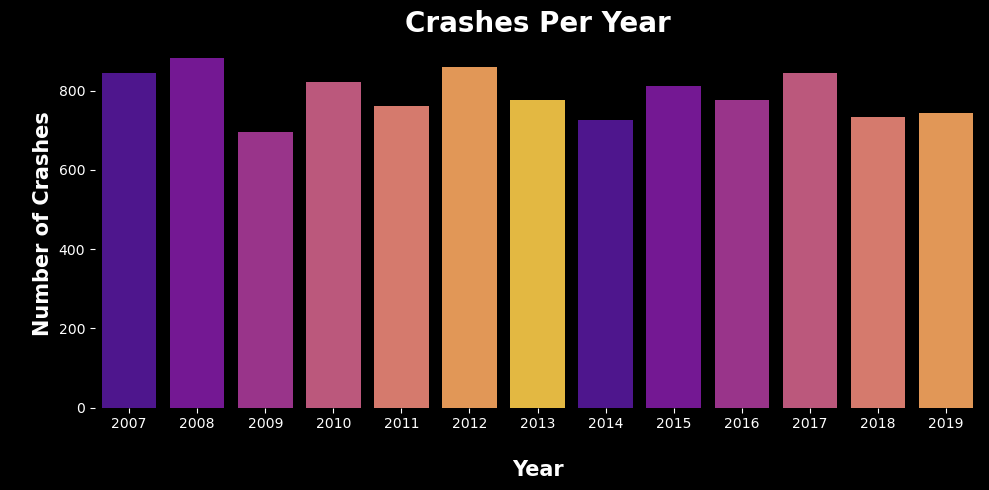

In [39]:
# Accidents by Year (Different Visualization)
crashesperyear =bike_Pedestrian_crash_df.groupby(['CrashYear'])['CrashID'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(crashesperyear.index,crashesperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Crashes", fontsize=15, fontweight="bold")
plt.savefig('crashesperyear.png')
plt.tight_layout()

/Users/pawankumarvadlamani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


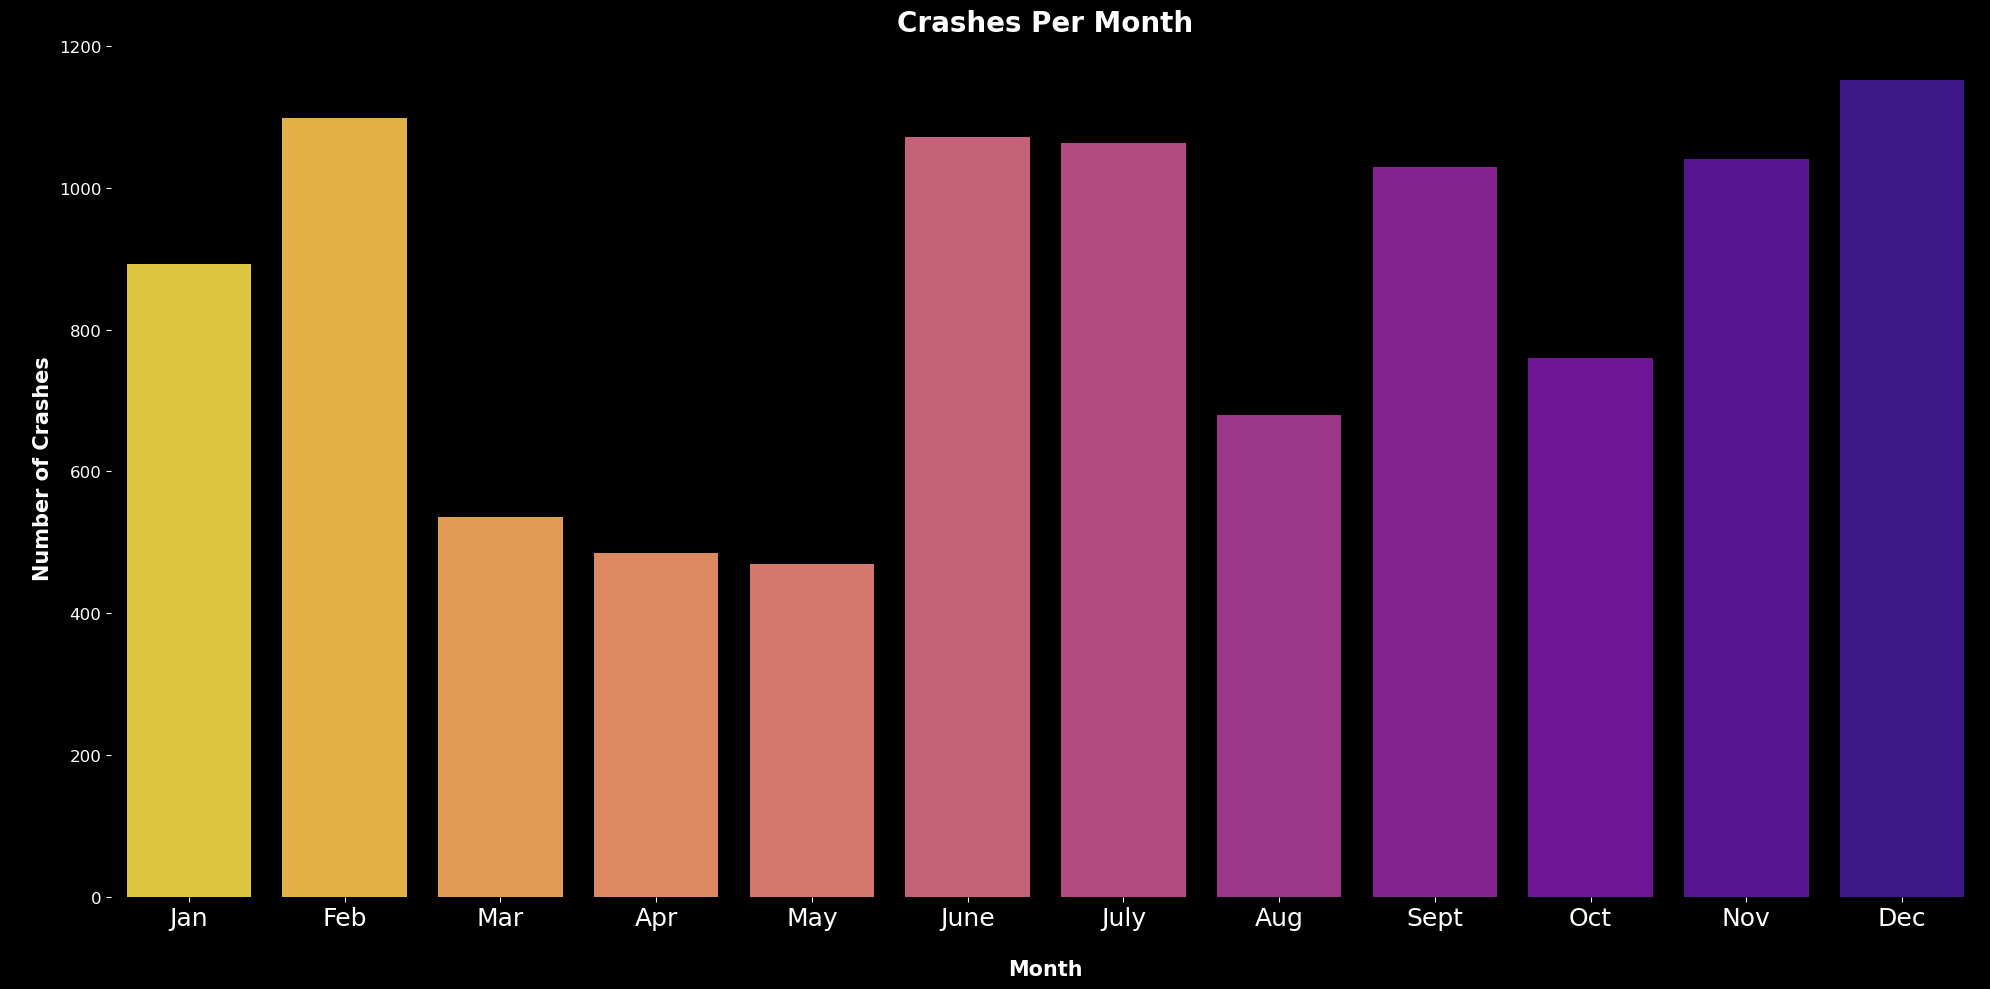

In [40]:
# Accidents By Month

crashespermonth = bike_Pedestrian_crash_df.groupby(['CrashMonth'])['CrashID'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(crashespermonth.index,crashespermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Crashes Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Crashes", fontsize=15, fontweight="bold")
plt.savefig('crashespermonth.png')
plt.tight_layout()

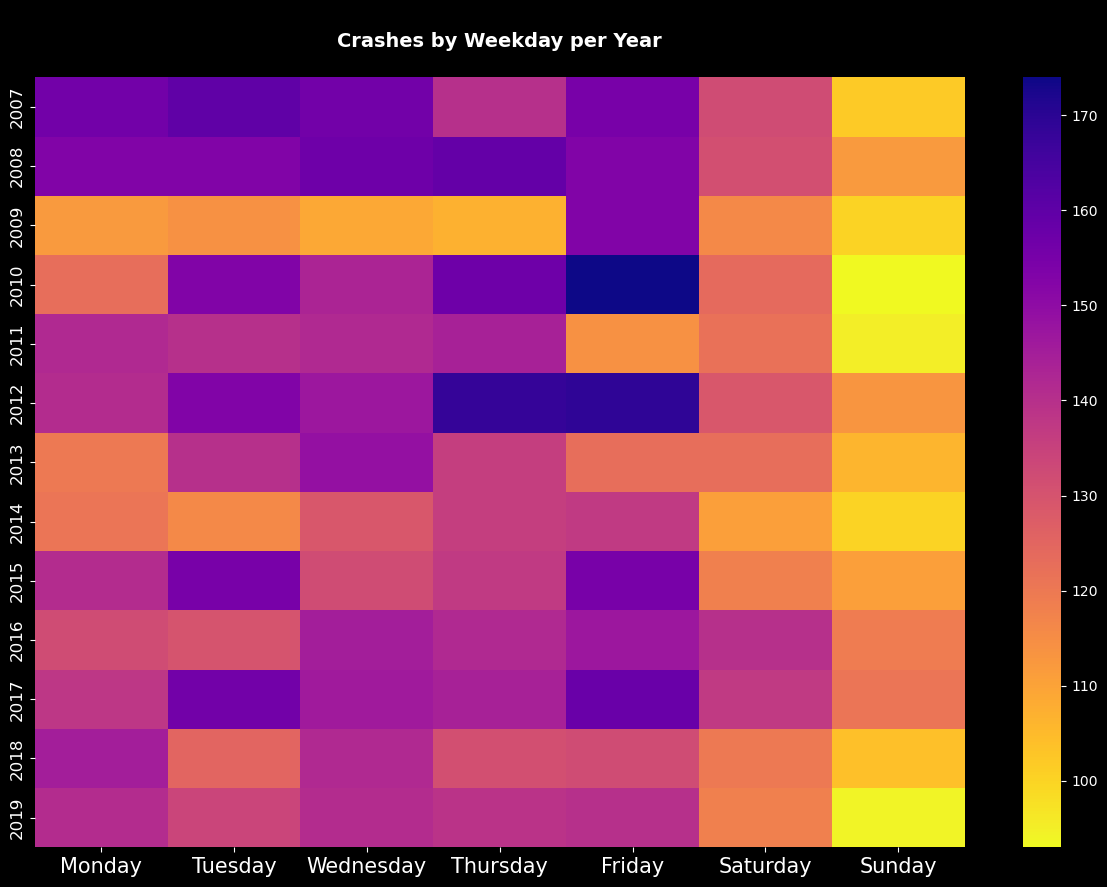

In [37]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crashesweekday = bike_Pedestrain_crash_df.groupby(['CrashYear', 'CrashDay']).size()
crashesweekday = crashesweekday.rename_axis(['CrashYear', 'CrashDay'])\
                               .unstack('CrashDay')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nCrashes by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('crashesbyweekdayperyear.png')
plt.show()

In [41]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"

timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
bike_Pedestrian_crash_df['CrashTimeofDay']=bike_Pedestrian_crash_df['CrashTimeofDay'].map(timeofdaygroups)

/Users/pawankumarvadlamani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


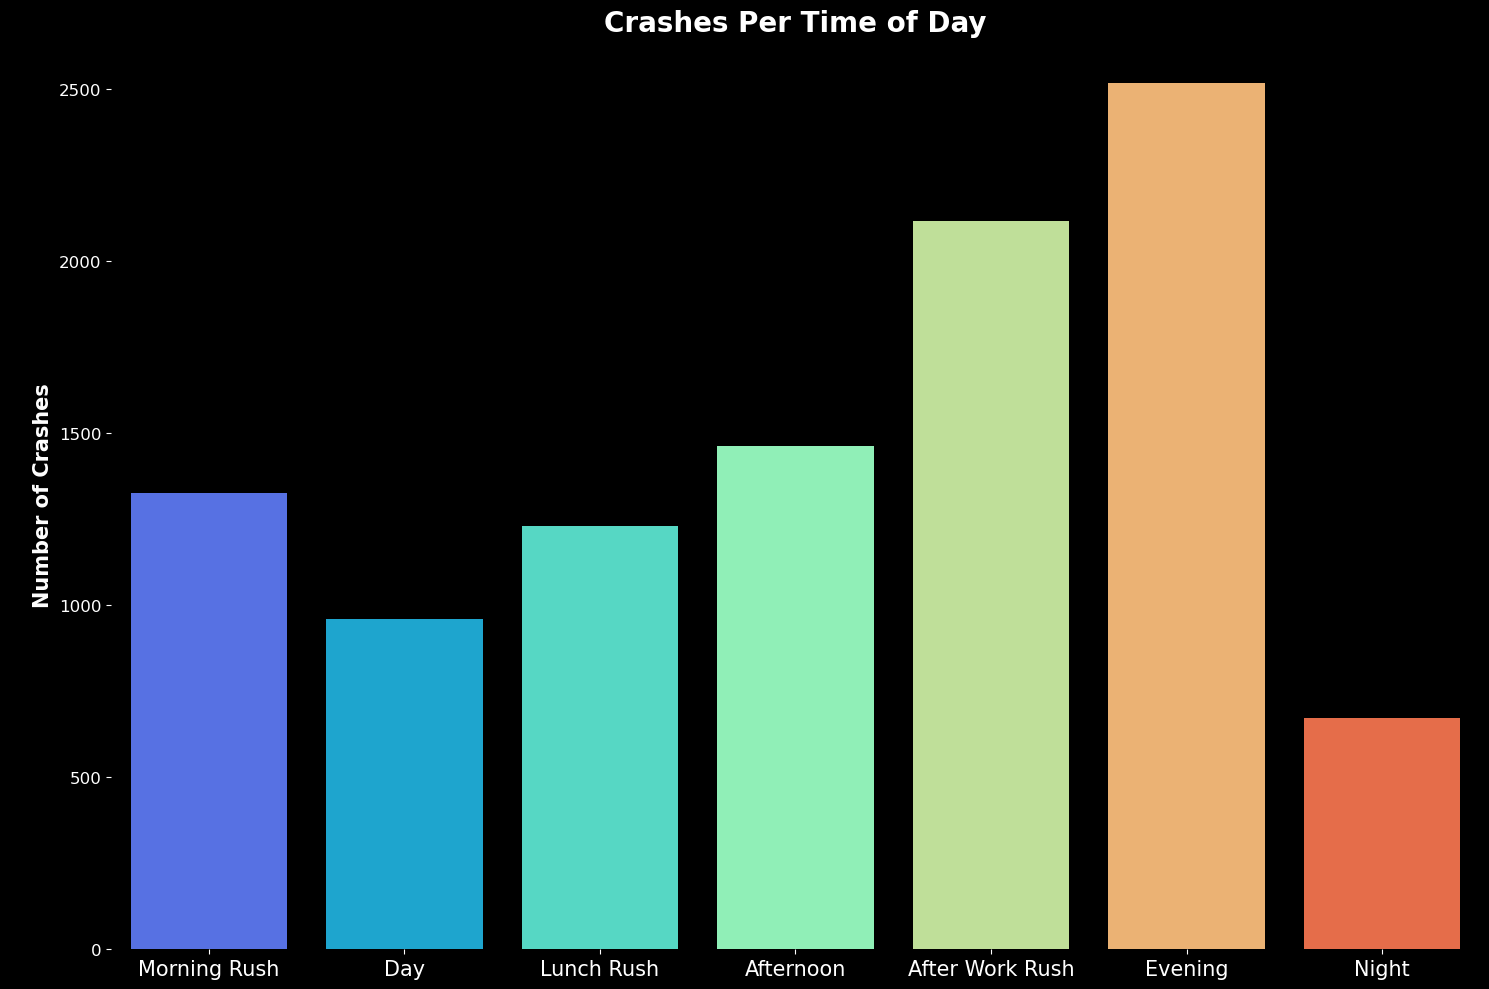

In [42]:
crashespertod = bike_Pedestrian_crash_df.groupby(['CrashTimeofDay'])['CrashID'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(crashespertod.index,crashespertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Crashes", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('crashespertod.png')

/Users/pawankumarvadlamani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


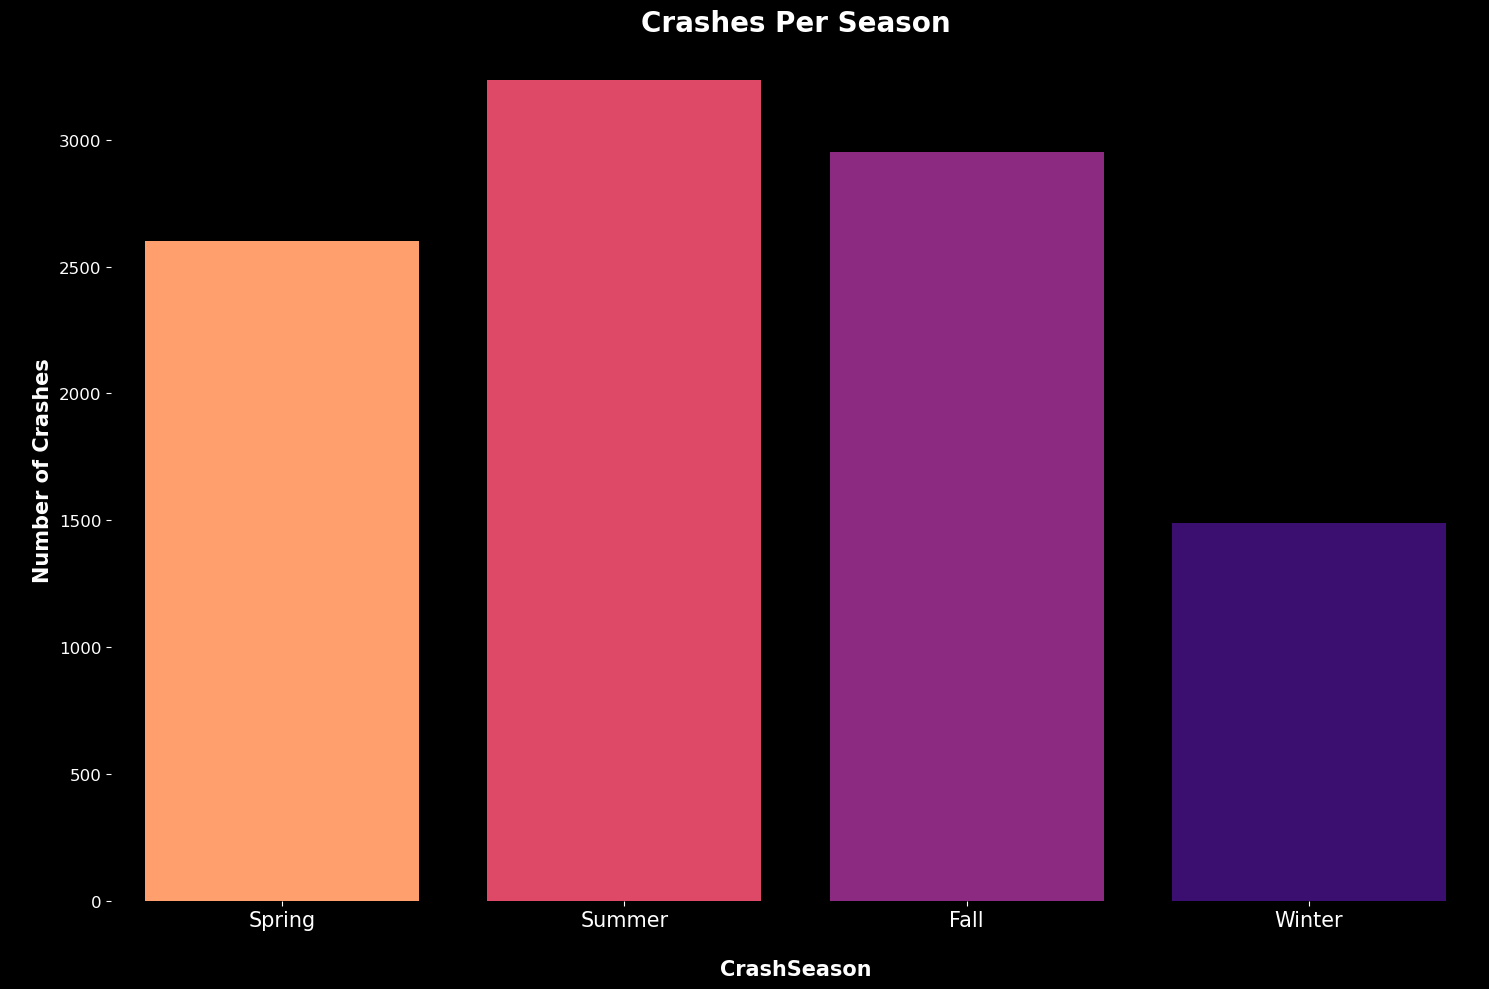

In [48]:
crashesperseason = bike_Pedestrian_crash_df.groupby(['CrashSeason'])['CrashID'].count()
seaord=['Spring', 'Summer', 'Fall','Winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(crashesperseason.index,crashesperseason.values, order=seaord, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nCrashSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Crashes", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('crashesperseason.png')

# Correlations 

In [ ]:
# For correlation, we used pearson correlation coefficient

In [43]:
#correlation by Crash Fatality pearson
corrdf=bike_Pedestrian_crash_df.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=bike_Pedestrian_crash_df.columns)
corr=corrdf.corr()['Crash_Fatality']
corr[np.argsort(corr,axis=0)[::-1]]

Crash_Fatality    1.000000
CrashSevr         0.230989
BikeInjury        0.223237
RuralUrban        0.160929
TraffCntrl        0.118529
Locality          0.116892
LightCond         0.089003
DrvrInjury        0.080860
RdCharacte        0.071763
Region            0.052866
NumLanes          0.038460
DrvrAgeGrp        0.023032
CrashMonth        0.018773
RdSurface         0.017720
CrashGrp          0.015998
Latitude          0.011986
RdDefects         0.007780
County            0.007282
BikeSex           0.003437
CrashDay          0.002170
CrashType         0.001719
RdFeature        -0.000080
Development      -0.006830
Workzone         -0.008095
Weather          -0.008687
RdConditio       -0.011714
CrashSeason      -0.011812
Longitude        -0.012295
DrvrRace         -0.016123
CrashID          -0.016641
CrashYear        -0.017013
DrvrVehTyp       -0.022515
BikeRace         -0.022549
CrashHour        -0.023427
BikePos          -0.024083
OBJECTID         -0.033374
RdConfig         -0.034043
D

# Machine Learning

In [44]:
# Create separate dataframe with index that wouldnt effect data vis above
bike_Pedestrian_crash_df1=bike_Pedestrian_crash_df
#set index to accident_index
bike_Pedestrian_crash_df1.set_index('CrashID', inplace=True)
bike_Pedestrian_crash_df1.head()

,AmbulanceR,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,...,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,CrashTimeofDay,CrashSeason,Crash_Fatality
CrashID,,,,,,,,,,,,,,,,,,,,,
101878313,Yes,0-19,.,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,Durham,...,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,1,After Work Rush,Winter,Non-Fatal
101885911,Yes,20-24,.,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,Cary,...,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,2,Morning Rush,Winter,Non-Fatal
101886055,Yes,30-39,.,No,Unknown,B: Suspected Minor Injury,Non-Roadway,Black,Male,Stallings,...,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,3,After Work Rush,Winter,Non-Fatal
101899756,Yes,40-59,.,No,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,Male,Fayetteville,...,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,5,Lunch Rush,Winter,Non-Fatal
101905904,No,40-59,.,Yes,With Traffic,A: Suspected Serious Injury,Travel Lane,Black,Male,None - Rural Crash,...,Piedmont,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Cloudy,No,7,Evening,Winter,Fatal


In [45]:
bike_Pedestrian_crash_df1 = bike_Pedestrian_crash_df1.drop(['CrashSevr'],axis=1)

In [46]:
bike_Pedestrian_crash_df1.head()

,AmbulanceR,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,...,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,CrashTimeofDay,CrashSeason,Crash_Fatality
CrashID,,,,,,,,,,,,,,,,,,,,,
101878313,Yes,0-19,.,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,Durham,...,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,1,After Work Rush,Winter,Non-Fatal
101885911,Yes,20-24,.,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,Cary,...,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,2,Morning Rush,Winter,Non-Fatal
101886055,Yes,30-39,.,No,Unknown,B: Suspected Minor Injury,Non-Roadway,Black,Male,Stallings,...,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,3,After Work Rush,Winter,Non-Fatal
101899756,Yes,40-59,.,No,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,Male,Fayetteville,...,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,5,Lunch Rush,Winter,Non-Fatal
101905904,No,40-59,.,Yes,With Traffic,A: Suspected Serious Injury,Travel Lane,Black,Male,None - Rural Crash,...,Piedmont,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Cloudy,No,7,Evening,Winter,Fatal


In [47]:
print(bike_Pedestrian_crash_df1.columns)

Index(['AmbulanceR', 'BikeAgeGrp', 'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir',
       'BikeInjury', 'BikePos', 'BikeRace', 'BikeSex', 'City', 'County',
       'CrashAlcoh', 'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc',
       'CrashMonth', 'CrashType', 'CrashYear', 'Development', 'DrvrAgeGrp',
       'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex',
       'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumLanes', 'NumUnits', 'RdCharacte', 'RdClass',
       'RdConditio', 'RdConfig', 'RdDefects', 'RdFeature', 'RdSurface',
       'Region', 'RuralUrban', 'SpeedLimit', 'TraffCntrl', 'Weather',
       'Workzone', 'OBJECTID', 'CrashTimeofDay', 'CrashSeason',
       'Crash_Fatality'],
      dtype='object')


# Preprocessing

In [48]:
#separate dtypes
notif=bike_Pedestrian_crash_df1.select_dtypes(exclude=['int','float','int64'])
intfldtypes = bike_Pedestrian_crash_df1.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
bike_Pedestrian_crash_df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(bike_Pedestrian_crash_df_ml.shape)

Objects Index(['AmbulanceR', 'BikeAgeGrp', 'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir',
       'BikeInjury', 'BikePos', 'BikeRace', 'BikeSex', 'City', 'County',
       'CrashAlcoh', 'CrashDay', 'CrashGrp', 'CrashLoc', 'CrashMonth',
       'CrashType', 'Development', 'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg',
       'DrvrInjury', 'DrvrRace', 'DrvrSex', 'DrvrVehTyp', 'HitRun',
       'LightCond', 'Locality', 'NumLanes', 'RdCharacte', 'RdClass',
       'RdConditio', 'RdConfig', 'RdDefects', 'RdFeature', 'RdSurface',
       'Region', 'RuralUrban', 'SpeedLimit', 'TraffCntrl', 'Weather',
       'Workzone', 'CrashTimeofDay', 'CrashSeason', 'Crash_Fatality'],
      dtype='object')

NonObjects Index(['CrashHour', 'CrashYear', 'Latitude', 'Longitude', 'NumUnits',
       'OBJECTID'],
      dtype='object')
(10279, 51)


In [49]:
#Set up of X and Y
X= bike_Pedestrian_crash_df_ml.drop(['Crash_Fatality'],axis=1)
y= bike_Pedestrian_crash_df_ml['Crash_Fatality']

In [50]:
bike_Pedestrian_crash_df_ml.Crash_Fatality.value_counts()

1    9433
0     846
Name: Crash_Fatality, dtype: int64

In [51]:
bike_Pedestrian_crash_df.dtypes

AmbulanceR         object
BikeAgeGrp         object
BikeAlcDrg         object
BikeAlcFlg         object
BikeDir            object
BikeInjury         object
BikePos            object
BikeRace           object
BikeSex            object
City               object
County             object
CrashAlcoh         object
CrashDay           object
CrashGrp           object
CrashHour           int64
CrashLoc           object
CrashMonth         object
CrashSevr          object
CrashType          object
CrashYear           int64
Development        object
DrvrAgeGrp         object
DrvrAlcDrg         object
DrvrAlcFlg         object
DrvrInjury         object
DrvrRace           object
DrvrSex            object
DrvrVehTyp         object
HitRun             object
Latitude          float64
LightCond          object
Locality           object
Longitude         float64
NumLanes           object
NumUnits            int64
RdCharacte         object
RdClass            object
RdConditio         object
RdConfig    

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [53]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)

/Users/pawankumarvadlamani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=500, random_state=0)

In [57]:
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0034987029831387807
Residual Sum of Squares(MSE): 0.0016745953307392997
R2-Score: 0.9777628961567513


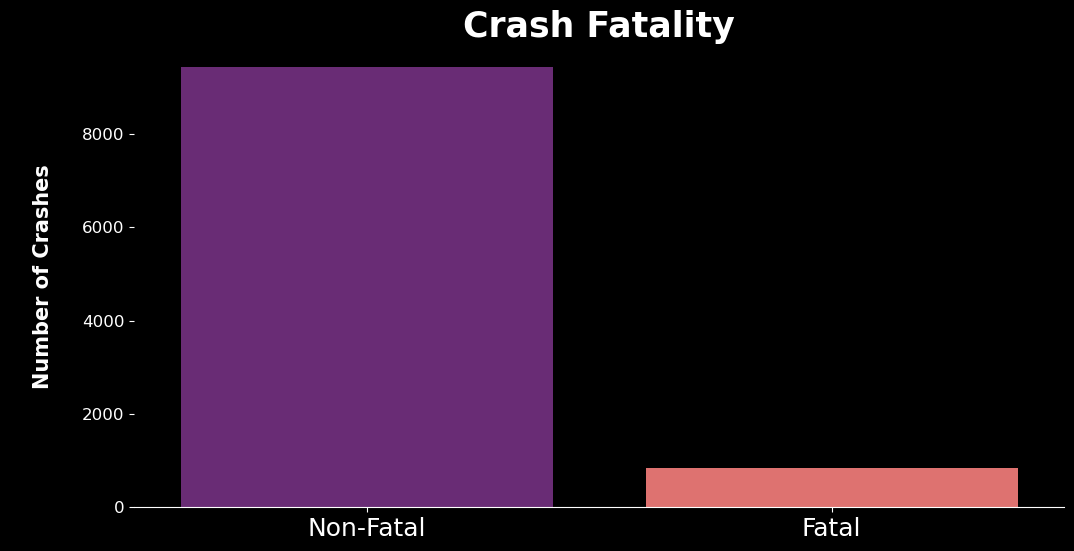

In [95]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="Crash_Fatality", palette="magma", data=bike_Pedestrian_crash_df)

plt.style.use('dark_background')
plt.title("Crash Fatality",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Crashes\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('crash_Fatality.png')
plt.show()

In [ ]:
## The data is skewed in this dataset. We will try to resample the data as undersampling, where we reduce the number of majority (Non-Fatal Accidents)

# Undersampling

In [59]:
# Setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.25, random_state=27)

In [63]:
# Concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [64]:
# Separate the 2 classes
Non_Fatal = res_X[res_X.Crash_Fatality==0]
Fatal = res_X[res_X.Crash_Fatality==1]

In [67]:
# Reduce majority
Non_Fatal_reduced = resample(Non_Fatal,
                          replace=True, 
                          n_samples=len(Fatal), 
                          random_state=27) 

In [68]:
# combine majority and severe_increased minority
bike_Pedestrian_crash_new_df = pd.concat([Fatal, Non_Fatal_reduced])

In [69]:
bike_Pedestrian_crash_new_df.Crash_Fatality.value_counts()

1    7061
0    7061
Name: Crash_Fatality, dtype: int64

In [70]:
res_X_train = bike_Pedestrian_crash_new_df.drop('Crash_Fatality', axis=1)
res_y_train = bike_Pedestrian_crash_new_df.Crash_Fatality

In [71]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(res_X_train, res_y_train)

/Users/pawankumarvadlamani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=500, random_state=0)

In [72]:
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0013073929961089493
Residual Sum of Squares(MSE): 0.00046800259403372246
R2-Score: 0.9937853509493286
